# 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 깨짐 문제 해결용
from matplotlib import font_manager, rc
plt.rcParams["axes.unicode_minus"] = False
path = "C:\Windows\Fonts\H2GTRM.TTF"
font_name = font_manager.FontProperties(fname=path).get_name()
rc("font", family=font_name)

# 1. Data

In [3]:
df = pd.read_csv("data/processed/labeled_data_CN7.csv", parse_dates=True)

In [4]:
df.set_index("TimeStamp", inplace=True)

In [5]:
df.head()

,_id,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2020-10-16 04:57:47,5f8928bb9c0189cc666ef19b,2020-10-16,24,CN7 W/S SIDE MLD'G RH,0,None,9.59,4.47,16.92,59.520000,...,59.299999,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,66.300003,24.799999,27.5
2020-10-16 04:58:48,5f8928de9c0189cc666ef20b,2020-10-16,24,CN7 W/S SIDE MLD'G RH,0,None,9.60,4.48,16.91,59.580002,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.6
2020-10-16 04:58:48,5f8928df9c0189cc666ef213,2020-10-16,23,CN7 W/S SIDE MLD'G LH,0,None,9.60,4.48,16.91,59.580002,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.6
2020-10-16 04:59:48,5f8928f39c0189cc666ef25e,2020-10-16,23,CN7 W/S SIDE MLD'G LH,0,None,9.59,4.48,16.91,59.560001,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.6
2020-10-16 04:59:48,5f8928f59c0189cc666ef265,2020-10-16,24,CN7 W/S SIDE MLD'G RH,0,None,9.59,4.48,16.91,59.560001,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3974 entries, 2020-10-16 04:57:47 to 2020-11-03 08:19:35
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   _id                       3974 non-null   object 
 1   PART_FACT_PLAN_DATE       3974 non-null   object 
 2   PART_FACT_SERIAL          3974 non-null   int64  
 3   PART_NAME                 3974 non-null   object 
 4   PassOrFail                3974 non-null   int64  
 5   Reason                    3974 non-null   object 
 6   Injection_Time            3974 non-null   float64
 7   Filling_Time              3974 non-null   float64
 8   Plasticizing_Time         3974 non-null   float64
 9   Cycle_Time                3974 non-null   float64
 10  Clamp_Close_Time          3974 non-null   float64
 11  Cushion_Position          3974 non-null   float64
 12  Switch_Over_Position      3974 non-null   float64
 13  Plasticizing_Position     3974 non-

In [7]:
df.nunique()

_id                         3974
PART_FACT_PLAN_DATE            6
PART_FACT_SERIAL              10
PART_NAME                      2
PassOrFail                     2
Reason                         4
Injection_Time                30
Filling_Time                  29
Plasticizing_Time             81
Cycle_Time                    34
Clamp_Close_Time               8
Cushion_Position              11
Switch_Over_Position           1
Plasticizing_Position         36
Clamp_Open_Position            2
Max_Injection_Speed           38
Max_Screw_RPM                 10
Average_Screw_RPM             10
Max_Injection_Pressure        20
Max_Switch_Over_Pressure      34
Max_Back_Pressure             38
Average_Back_Pressure         26
Barrel_Temperature_1          41
Barrel_Temperature_2          36
Barrel_Temperature_3          26
Barrel_Temperature_4          48
Barrel_Temperature_5          33
Barrel_Temperature_6          23
Hopper_Temperature            80
Mold_Temperature_3            54
Mold_Tempe

In [8]:
df.head()

,_id,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2020-10-16 04:57:47,5f8928bb9c0189cc666ef19b,2020-10-16,24,CN7 W/S SIDE MLD'G RH,0,None,9.59,4.47,16.92,59.520000,...,59.299999,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,66.300003,24.799999,27.5
2020-10-16 04:58:48,5f8928de9c0189cc666ef20b,2020-10-16,24,CN7 W/S SIDE MLD'G RH,0,None,9.60,4.48,16.91,59.580002,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.6
2020-10-16 04:58:48,5f8928df9c0189cc666ef213,2020-10-16,23,CN7 W/S SIDE MLD'G LH,0,None,9.60,4.48,16.91,59.580002,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.6
2020-10-16 04:59:48,5f8928f39c0189cc666ef25e,2020-10-16,23,CN7 W/S SIDE MLD'G LH,0,None,9.59,4.48,16.91,59.560001,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.6
2020-10-16 04:59:48,5f8928f59c0189cc666ef265,2020-10-16,24,CN7 W/S SIDE MLD'G RH,0,None,9.59,4.48,16.91,59.560001,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.6


# EDA

In [9]:
numerical_features = [x for x in df.columns if np.dtype(df[x]) == 'float64']
categorical_features = (set(df.columns.tolist()) - 
                        set(numerical_features) - 
                        set(['_id', 'PART_NAME', 'PassOrFail', 'Reason']))

In [10]:
categorical_features

{'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL'}

In [11]:
pass_df = df.query("PassOrFail == 0")
fail_df = df.query("PassOrFail == 1")

## Categorical Features

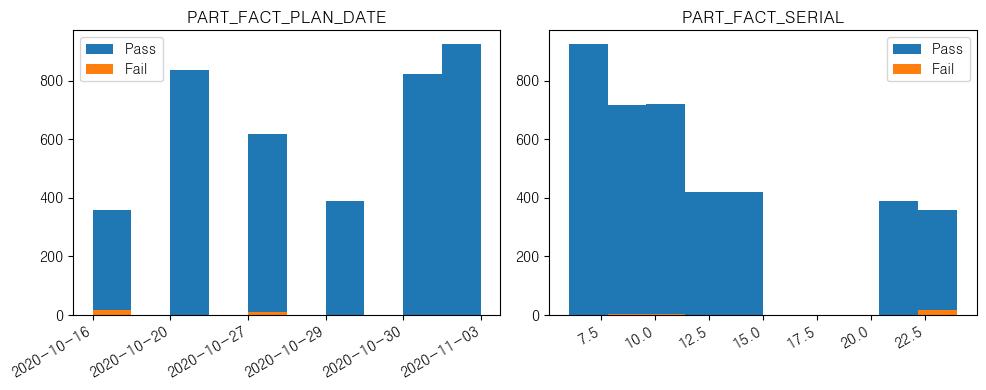

In [12]:
fig, axs = plt.subplots(figsize=(10, 4), ncols=2)

for i, feat in enumerate(categorical_features):
    axs[i].hist(pass_df[f"{feat}"], label="Pass", bins=10)
    axs[i].hist(fail_df[f"{feat}"], label="Fail", bins=10)
    axs[i].set_title(f"{feat}")
    axs[i].legend()
fig.autofmt_xdate()
plt.tight_layout()
plt.show();

- Categorical Feature와 관련해서는 합격품과 불량품 간 특별한 차이를 찾지 못하였음

## Numerical Features

In [13]:
len(numerical_features)

25

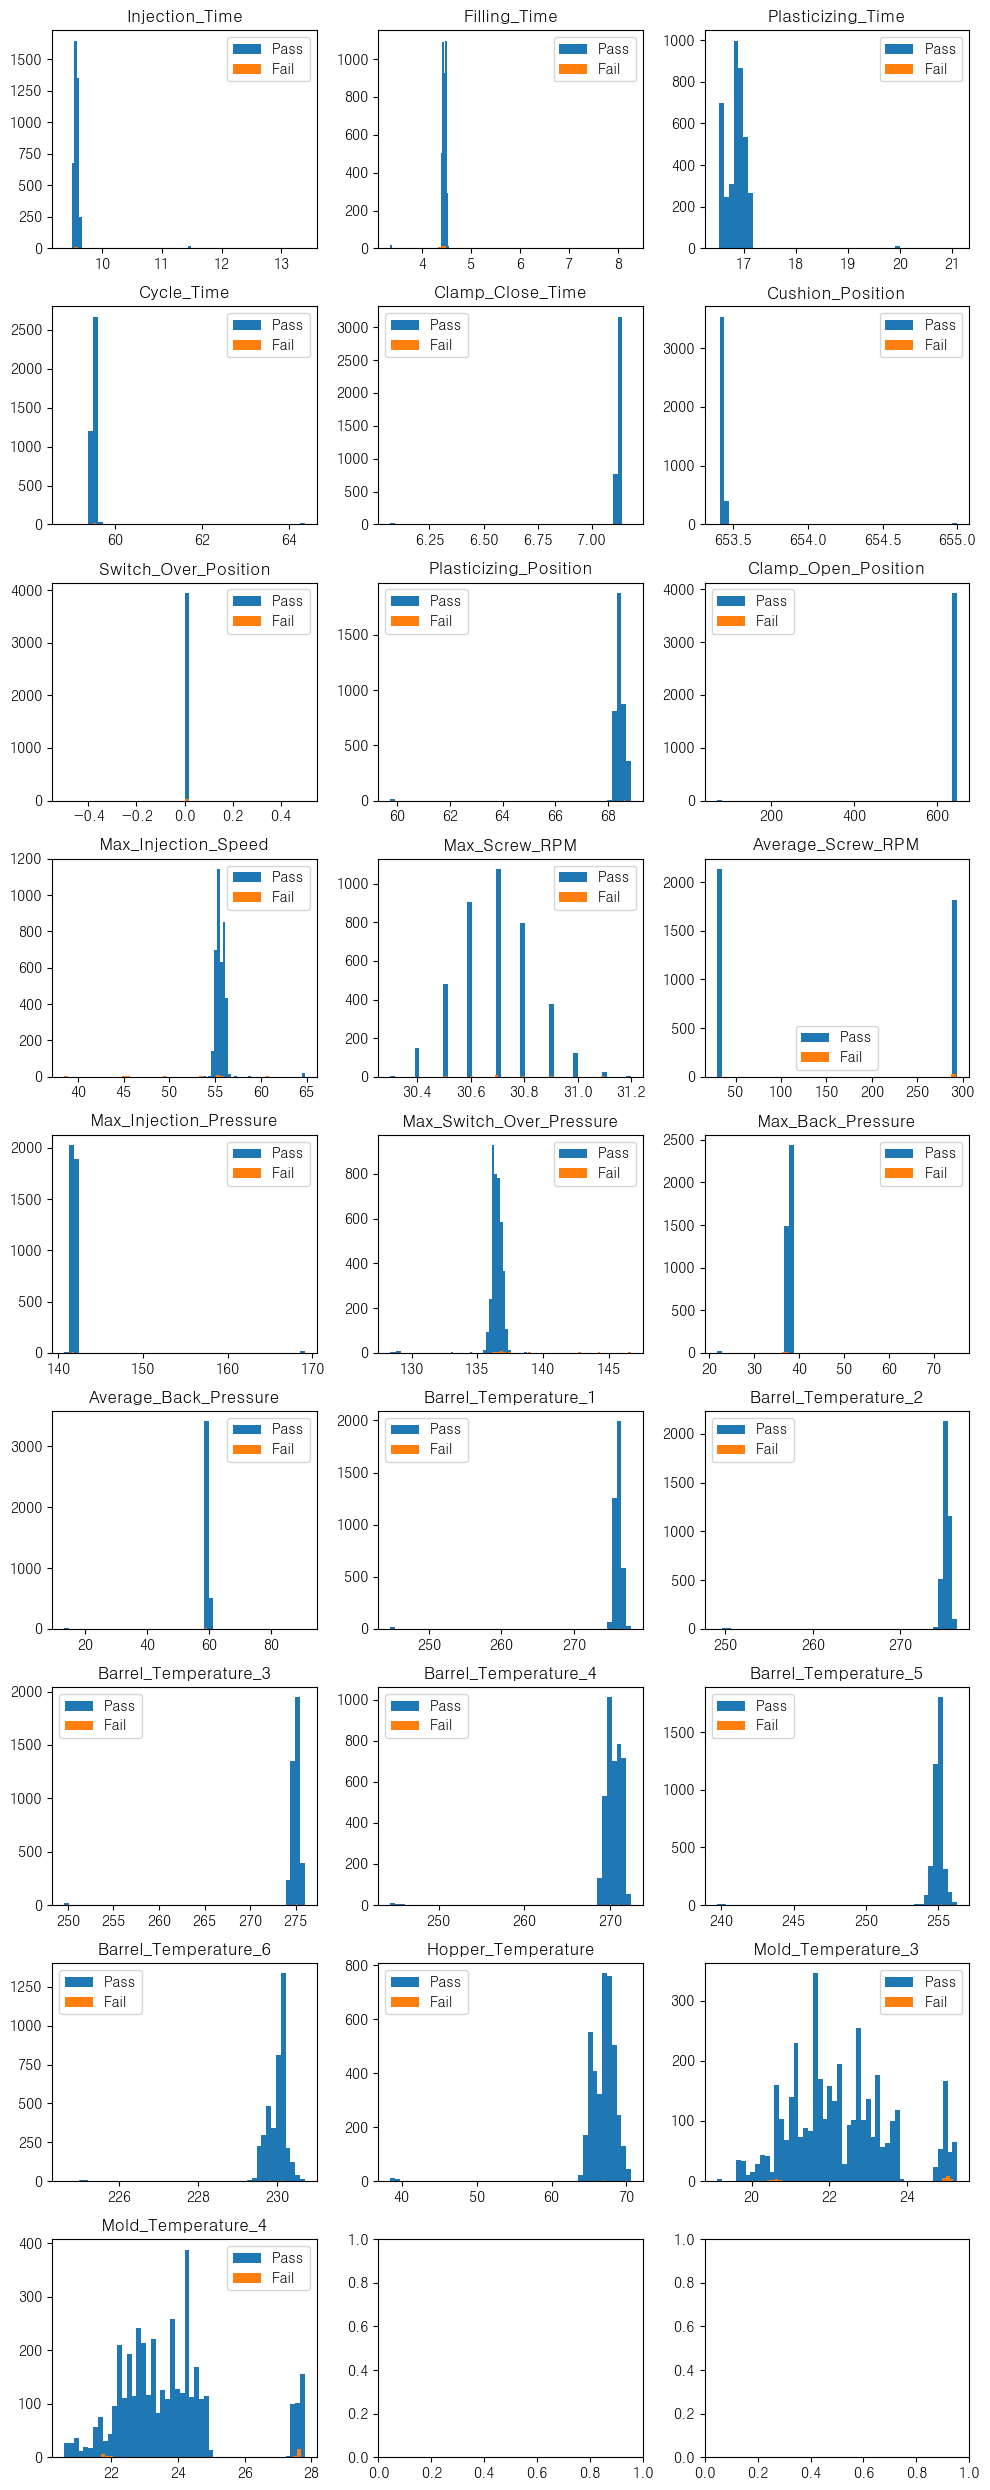

In [14]:
fig, axs = plt.subplots(figsize=(10, 25), nrows=9, ncols=3)

r = 0
c = 0
for i, feat in enumerate(numerical_features):
    axs[r, c].hist(pass_df[f"{feat}"], label="Pass", bins=50)
    axs[r, c].hist(fail_df[f"{feat}"], label="Fail", bins=50)
    axs[r, c].set_title(f"{feat}")
    axs[r, c].legend()
    if c < 2:
        c += 1
    else:
        r += 1
        c = 0
#fig.autofmt_xdate()
plt.tight_layout()
plt.show();

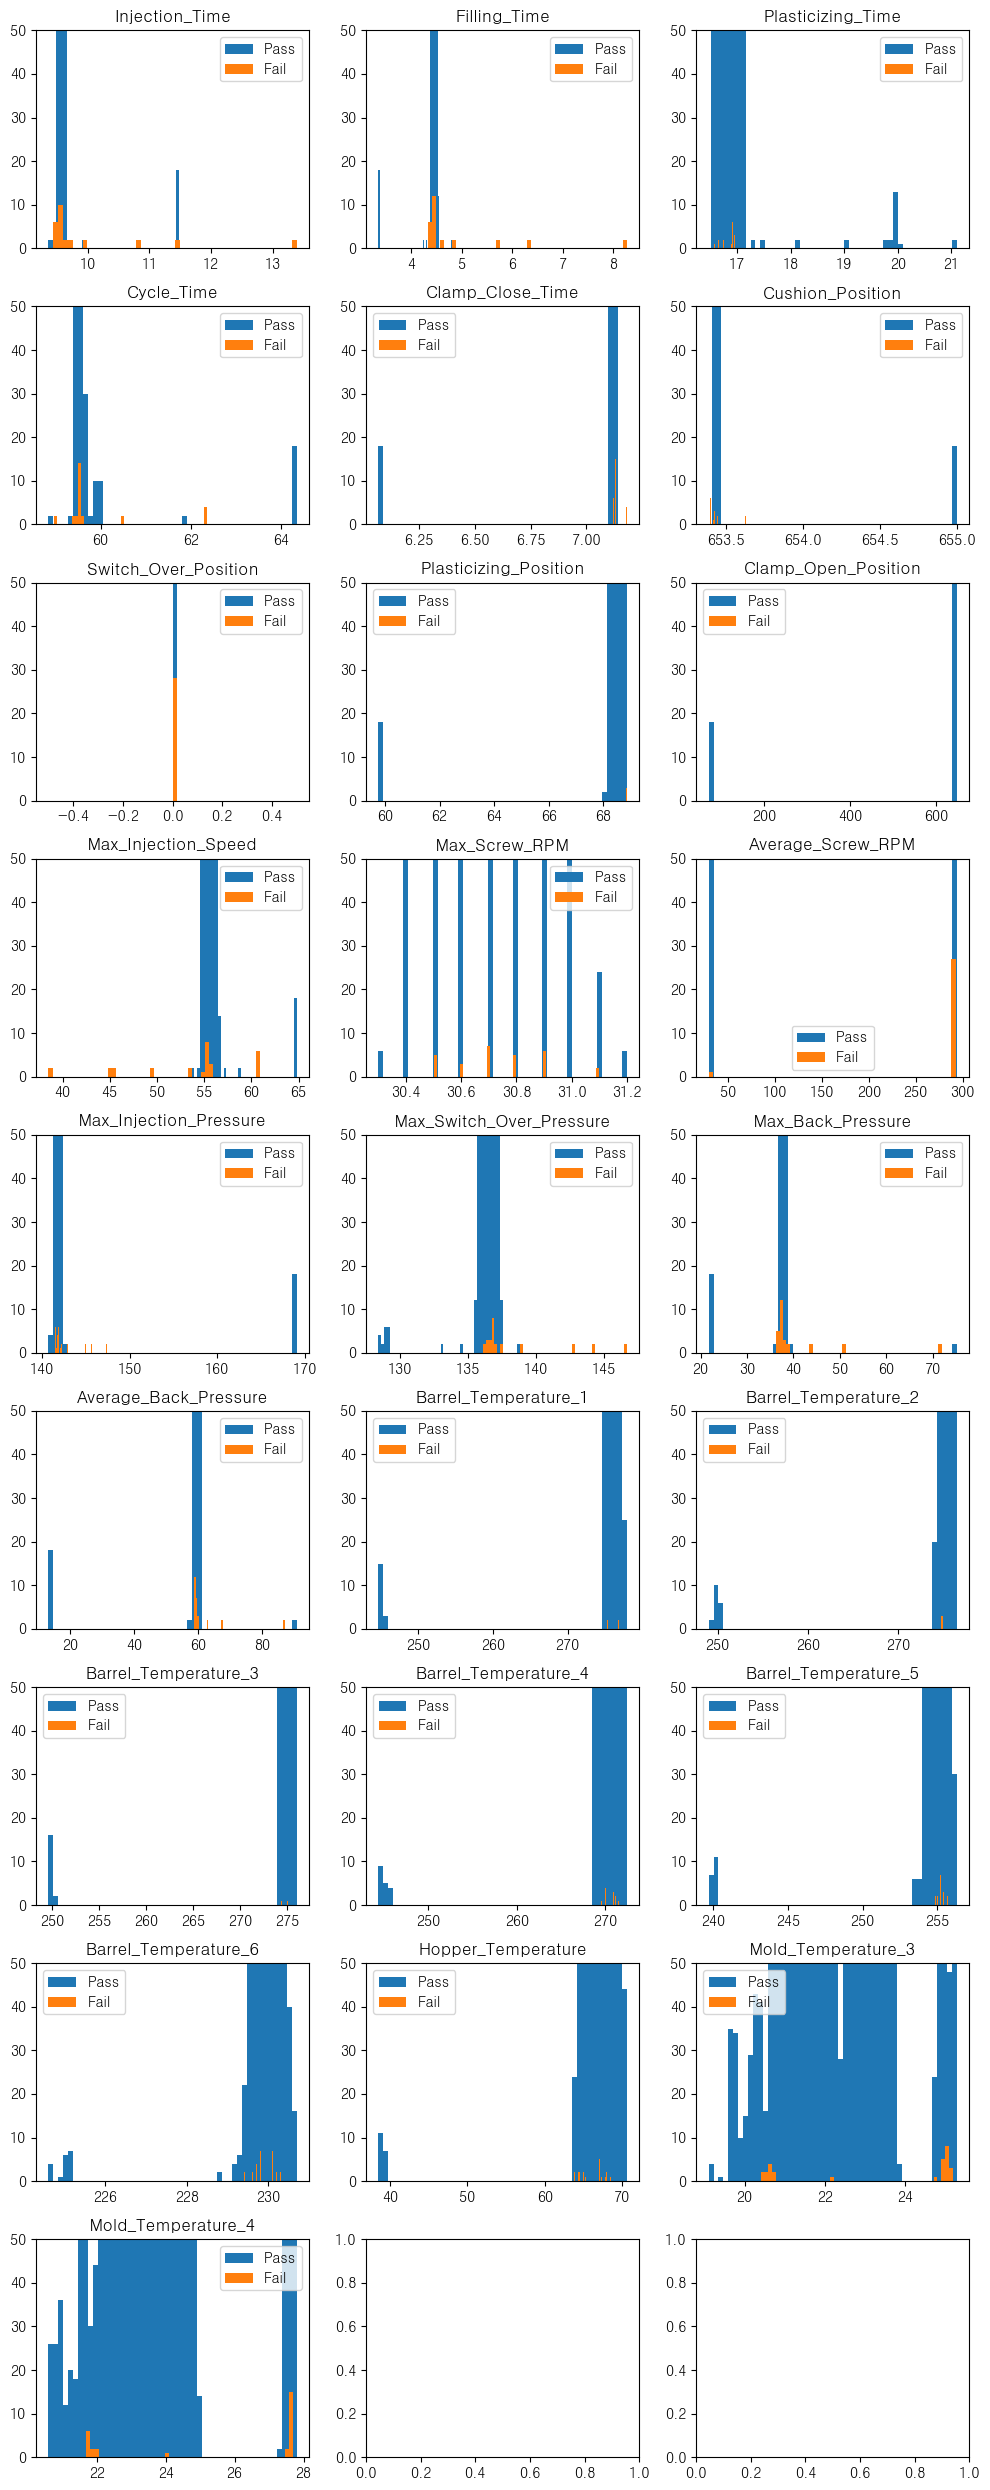

In [15]:
# Y-Axis 범위 조정

fig, axs = plt.subplots(figsize=(10, 25), nrows=9, ncols=3, )

r = 0
c = 0
for i, feat in enumerate(numerical_features):
    axs[r, c].hist(pass_df[f"{feat}"], label="Pass", bins=50)
    axs[r, c].hist(fail_df[f"{feat}"], label="Fail", bins=50)
    axs[r, c].set_title(f"{feat}")
    axs[r, c].set_ylim(0, 50)
    axs[r, c].legend()
    if c < 2:
        c += 1
    else:
        r += 1
        c = 0
#fig.autofmt_xdate()
plt.tight_layout()
plt.show();

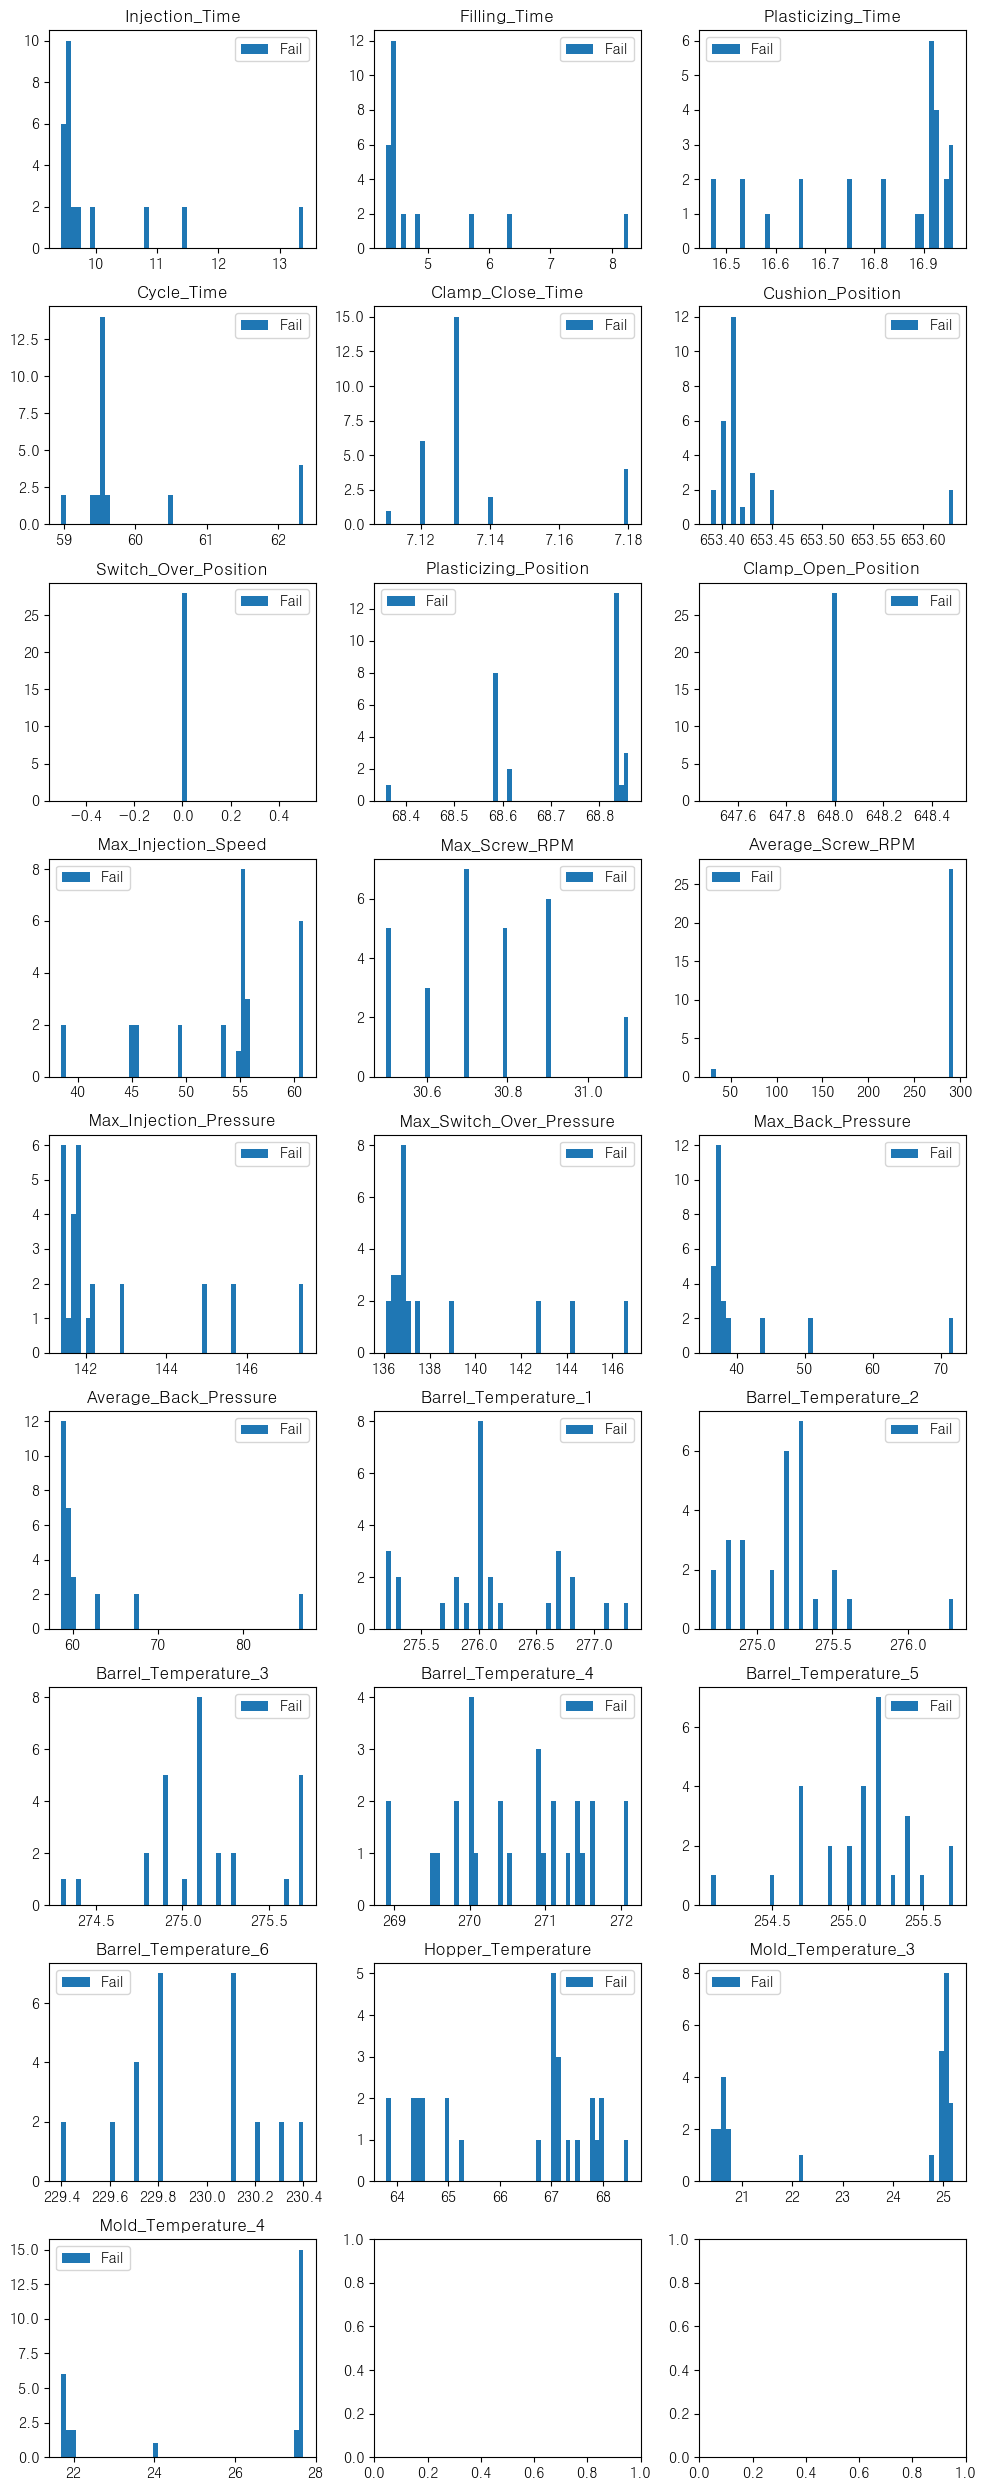

In [16]:
# Fail Only

fig, axs = plt.subplots(figsize=(10, 25), nrows=9, ncols=3)

r = 0
c = 0
for i, feat in enumerate(numerical_features):
    axs[r, c].hist(fail_df[f"{feat}"], label="Fail", bins=50)
    axs[r, c].set_title(f"{feat}")
    axs[r, c].legend()
    if c < 2:
        c += 1
    else:
        r += 1
        c = 0
#fig.autofmt_xdate()
plt.tight_layout()
plt.show();

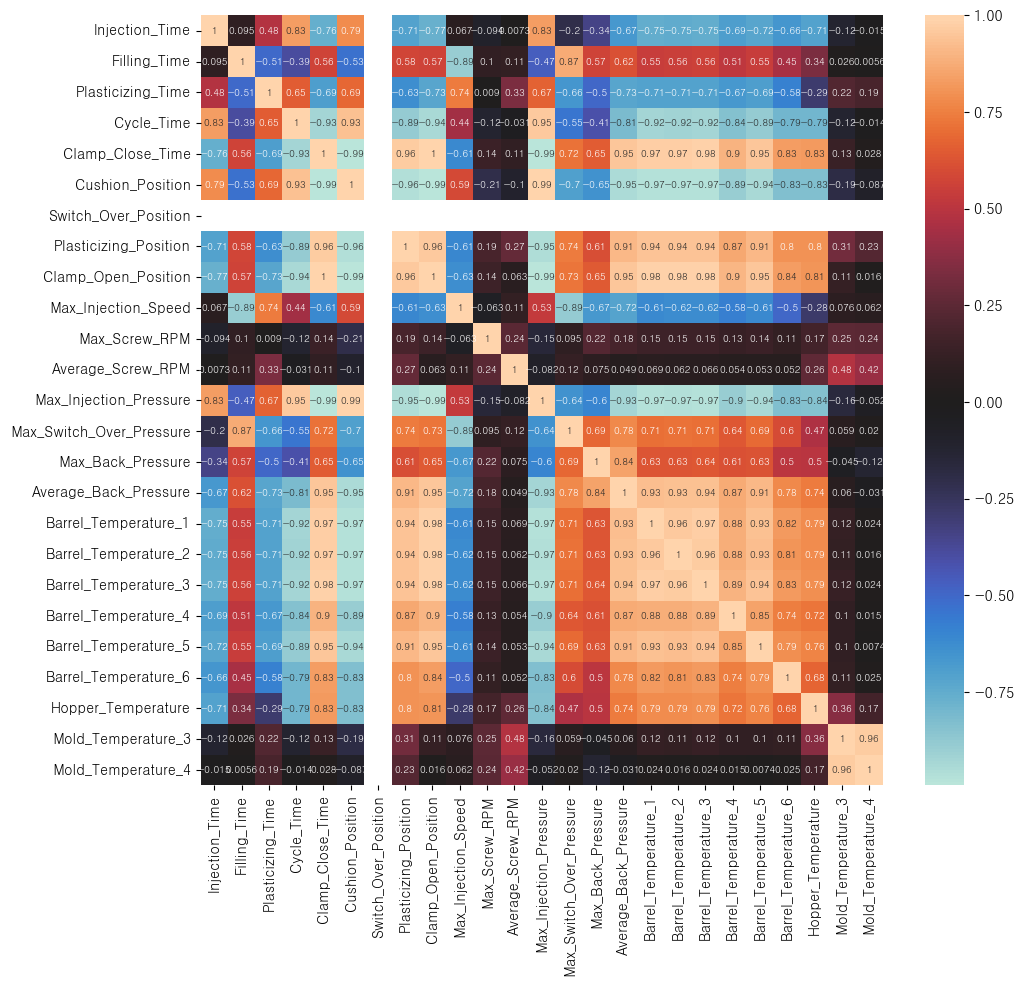

In [17]:
f, ax = plt.subplots(figsize=(11, 10))

sns.heatmap(
    df[numerical_features].corr(method='pearson'),
    center=0,
    annot=True,
    annot_kws={"size": 7}
);

- Numerical Feature의 경우 `Clamp_Close_Time`, `Cushion_Position`, `Switch_Over_Position`, `Clamp_Open_Position`, `Barrel_Temperature_1`, `Barrel_Temperature_2`, `Barrel_Temperature_3`, `Barrel_Temperature_4`, `Barrel_Temperature_5`, `Barrel_Temperature_6` 은 영향이 적다 판단됨

# Features 도출

In [18]:
drop_features = (
    list(categorical_features) + 
    [
        "Clamp_Close_Time", "Cushion_Position", "Switch_Over_Position", "Clamp_Open_Position", 
        "Barrel_Temperature_1", "Barrel_Temperature_2", "Barrel_Temperature_3", "Barrel_Temperature_4", 
        "Barrel_Temperature_5", "Barrel_Temperature_6"
    ] +
    ["PART_NAME"]
)

In [19]:
final_columns = set(df.columns.tolist()) - set(drop_features)

In [20]:
df = df[list(final_columns)].copy()

In [21]:
df

,Average_Screw_RPM,Cycle_Time,Mold_Temperature_3,_id,Mold_Temperature_4,Average_Back_Pressure,Max_Back_Pressure,Max_Switch_Over_Pressure,Reason,Plasticizing_Time,Max_Injection_Pressure,Filling_Time,Plasticizing_Position,Max_Screw_RPM,Hopper_Temperature,Injection_Time,Max_Injection_Speed,PassOrFail
TimeStamp,,,,,,,,,,,,,,,,,,
2020-10-16 04:57:47,292.500000,59.520000,24.799999,5f8928bb9c0189cc666ef19b,27.500000,59.299999,37.400002,136.800003,None,16.920000,141.800003,4.47,68.849998,30.700001,66.300003,9.59,55.400002,0
2020-10-16 04:58:48,292.500000,59.580002,24.799999,5f8928de9c0189cc666ef20b,27.600000,59.299999,37.500000,136.899994,None,16.910000,141.800003,4.48,68.839996,30.799999,67.199997,9.60,55.299999,0
2020-10-16 04:58:48,292.500000,59.580002,24.799999,5f8928df9c0189cc666ef213,27.600000,59.299999,37.500000,136.899994,None,16.910000,141.800003,4.48,68.839996,30.799999,67.199997,9.60,55.299999,0
2020-10-16 04:59:48,292.500000,59.560001,25.000000,5f8928f39c0189cc666ef25e,27.600000,59.299999,37.500000,136.800003,None,16.910000,141.800003,4.48,68.839996,31.000000,66.900002,9.59,55.299999,0
2020-10-16 04:59:48,292.500000,59.560001,25.000000,5f8928f59c0189cc666ef265,27.600000,59.299999,37.500000,136.800003,None,16.910000,141.800003,4.48,68.839996,31.000000,66.900002,9.59,55.299999,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-03 08:17:36,29.200001,59.560001,21.000000,5fa112859c0189cc66dabe34,22.400000,59.900002,38.299999,137.000000,None,16.620001,142.100006,4.48,68.330002,30.700001,66.099998,9.60,54.900002,0
2020-11-03 08:18:37,29.200001,59.560001,21.000000,5fa112869c0189cc66dabe42,22.400000,59.900002,38.400002,136.800003,None,16.650000,142.100006,4.48,68.349998,30.700001,66.099998,9.60,55.000000,0
2020-11-03 08:18:37,29.200001,59.560001,21.000000,5fa112879c0189cc66dabe50,22.400000,59.900002,38.400002,136.800003,None,16.650000,142.100006,4.48,68.349998,30.700001,66.099998,9.60,55.000000,0


In [22]:
df.to_csv("data/processed/labeled_data_CN7_1.csv", index=True)

# 추가 분석

In [23]:
pass_df[list(final_columns)].describe().loc[["mean", "std"], :]

,Average_Screw_RPM,Cycle_Time,Mold_Temperature_3,Mold_Temperature_4,Average_Back_Pressure,Max_Back_Pressure,Max_Switch_Over_Pressure,Plasticizing_Time,Max_Injection_Pressure,Filling_Time,Plasticizing_Position,Max_Screw_RPM,Hopper_Temperature,Injection_Time,Max_Injection_Speed,PassOrFail
mean,150.101901,59.539798,22.263609,23.680106,59.341941,37.830259,136.486391,16.850682,142.032261,4.442359,68.412349,30.692524,66.881348,9.571581,55.610289,0.0
std,131.220068,0.331828,1.284204,1.554782,3.197323,1.423846,0.629929,0.287208,1.832119,0.081713,0.606700,0.144199,2.333611,0.133726,0.781951,0.0


In [24]:
fail_df[list(final_columns)].describe().loc[["mean", "std"], :]

,Average_Screw_RPM,Cycle_Time,Mold_Temperature_3,Mold_Temperature_4,Average_Back_Pressure,Max_Back_Pressure,Max_Switch_Over_Pressure,Plasticizing_Time,Max_Injection_Pressure,Filling_Time,Plasticizing_Position,Max_Screw_RPM,Hopper_Temperature,Injection_Time,Max_Injection_Speed,PassOrFail
mean,283.064284,59.950000,23.357143,25.45000,62.107143,41.232142,138.578571,16.815357,142.710712,4.970714,68.736783,30.742857,66.257144,10.086429,53.360714,1.0
std,49.752760,1.045732,2.192146,2.82548,7.418741,9.441048,3.324471,0.166677,1.855988,1.099980,0.142648,0.170899,1.530778,1.101007,6.450630,0.0


In [25]:
# Just to extract the final features for the boxplot

final_features = [
    'Plasticizing_Position', 'Average_Back_Pressure', 'Max_Switch_Over_Pressure', 
    'Cycle_Time', 'Injection_Time', 'Max_Injection_Speed', 'Max_Screw_RPM', 
    'Mold_Temperature_4', 'Plasticizing_Time', 'Filling_Time', 'Hopper_Temperature', 
    'Mold_Temperature_3', 'Max_Back_Pressure', 'Max_Injection_Pressure', 'Average_Screw_RPM'
]

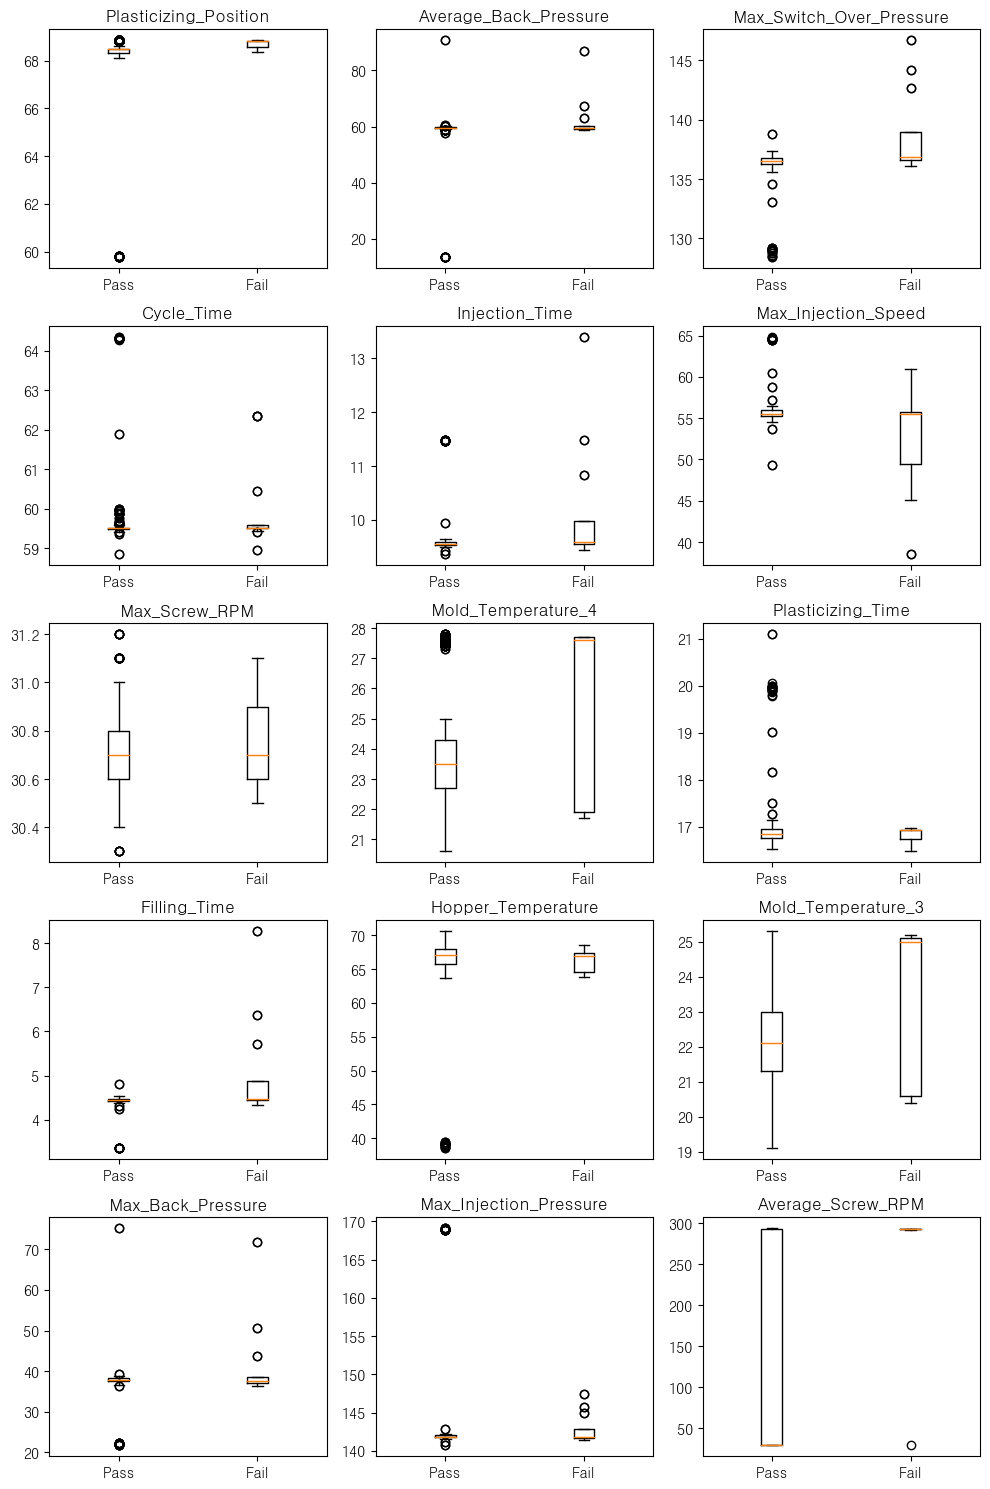

In [26]:
fig, axs = plt.subplots(figsize=(10, 15), nrows=5, ncols=3)

r = 0
c = 0
for i, feat in enumerate(list(final_features)):
    axs[r, c].boxplot(
        [pass_df[f"{feat}"], fail_df[f"{feat}"]], 
        #positions=[1, 3],
        labels=["Pass", "Fail"]
    )
    axs[r, c].set_title(f"{feat}")
    if c < 2:
        c += 1
    else:
        r += 1
        c = 0
#fig.autofmt_xdate()
plt.tight_layout()
plt.show();